In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
from datetime import timedelta


In [2]:
def load_pkl(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data
activity = "cleaning"

In [3]:
P = load_pkl(r"C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\daily_activation_pro.pkl".format(activity))
T_p = np.load(r"C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\start_time_pro.npy".format(activity))
D_p = load_pkl(r"C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\duration_lst.pkl".format(activity))
C_a = load_pkl(r"C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\activity_appliance_activation_times.pkl".format(activity))
U_a = load_pkl(r"C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\appliance_start_proba.pkl".format(activity))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ASUS\\Desktop\\Few-shot NILM (2)\\activity_annotation\\stochastic model\\cleaning\\daily_activation_pro.pkl'

In [46]:
U_a[8]

{'kettle': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'breadmaker': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'gas': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'microwave': array([0.1  , 0.075, 0.1  , 0.075, 0.025, 0.05 , 0.1  , 0.15 , 0.1  ,
        0.225]),
 'toaster': array([0.        , 0.13333333, 0.2       , 0.06666667, 0.06666667,
        0.1       , 0.03333333, 0.1       , 0.06666667, 0.23333333])}

In [47]:
import random

def sample_occurrences(prob_dict):
    """
    Sample an occurrence count based on the given probability distribution.

    :param prob_dict: A dictionary where keys are occurrence counts and values are the corresponding probabilities.
    :return: The sampled occurrence count.
    """
    # Generate a list of cumulative probabilities
    cumulative_probabilities = []
    cumulative_sum = 0
    for count, prob in prob_dict.items():
        cumulative_sum += prob
        cumulative_probabilities.append((cumulative_sum, count))

    # Generate a random number and find the corresponding occurrence count
    rand_num = random.random()
    for cum_prob, count in cumulative_probabilities:
        if rand_num < cum_prob:
            return count
# Test the function with the provided probability distribution
prob_dict = {1: 0.5150684931506849, 2: 0.14246575342465753, 3: 0.010958904109589041, 0: 0.3315068493150685}
sample_occurrences(prob_dict)


1

In [48]:
import numpy as np

def sample_start(prob_array):
    """
    Sample an event start time based on the given probability distribution.

    :param prob_array: A numpy array where indices are event times and values are the corresponding probabilities.
    :return: The sampled event start time.
    """
    # Generate a cumulative sum of probabilities
    cumulative_probabilities = np.cumsum(prob_array)

    # Generate a random number and find the corresponding event start time
    rand_num = random.random()
    for idx, cum_prob in enumerate(cumulative_probabilities):
        if rand_num < cum_prob:
            start = idx
            random_num = random.sample(range(0,60),1)[0]
            start = timedelta(hours=start)+timedelta(minutes=random_num)
            return start

In [49]:
def sample_relative_usage_time(prob_array):
    """
    Sample an event start time based on the given probability distribution.

    :param prob_array: A numpy array where indices are event times and values are the corresponding probabilities.
    :return: The sampled event start time.
    """
    # Generate a cumulative sum of probabilities
    cumulative_probabilities = np.cumsum(prob_array)

    # Generate a random number and find the corresponding event start time
    rand_num = random.random()
    for idx, cum_prob in enumerate(cumulative_probabilities):
        if rand_num < cum_prob:
            start = idx
            return start

In [50]:
def sample_duration(duration_lst):
    duration = random.sample(duration_lst,1)[0]
    return timedelta(minutes=duration)

In [51]:
def sample_appliance_count(prob_dict):
    """
    Sample an occurrence count based on the given probability distribution.

    :param prob_dict: A dictionary where keys are occurrence counts and values are the corresponding probabilities.
    :return: The sampled occurrence count.
    """
    # Generate a list of cumulative probabilities
    cumulative_probabilities = []
    cumulative_sum = 0
    for count, prob in prob_dict.items():
        cumulative_sum += prob
        cumulative_probabilities.append((cumulative_sum, count))

    # Generate a random number and find the corresponding occurrence count
    rand_num = random.random()
    for cum_prob, count in cumulative_probabilities:
        if rand_num < cum_prob:
            return count

In [94]:
appliance_time = {}
appliance_lst = ["kettle","breadmaker","gas","microwave","toaster"]
for i in appliance_lst:
    appliance_time[i]=[]
activity_labels = []

In [97]:
days = 100
start_date = pd.to_datetime("2024-9-04 00:00:00")

for i in range(days):
    activity_lst = [] # a list to check whether two activities overlap
    for activity_index, p in enumerate(P): # sample occurrences of each activity pattern
        o = sample_occurrences(p)
        for m in range(o):
            overlap = True
            while overlap:
                s = start_date+sample_start(T_p[activity_index])
                d = sample_duration(D_p[activity_index])
                e = s+d
                if activity_lst == []: # check overlap
                    overlap = False
                else:
                    for start, end in activity_lst: # check overlap
                        if ((start>=s and e>=start) or (s>=end and end>=e)):
                            overlap=True
                        else:
                            overlap=False
            activity_lst.append((s,e))
            print(s)
            for ap, prob in C_a[activity_index].items():
                c = sample_appliance_count(prob)
                for n in range(c):
                    appliance_start_time = int(sample_relative_usage_time(U_a[activity_index][ap])*d.seconds)
                    u_s = s+timedelta(seconds=appliance_start_time)
                    appliance_time[ap].append(u_s)
    activity_labels.append(activity_lst)
    start_date+=timedelta(days=1)

2024-09-04 19:17:00
2024-09-05 08:32:00
2024-09-05 07:29:00
2024-09-05 19:36:00
2024-09-05 12:10:00
2024-09-05 11:08:00
2024-09-06 07:56:00
2024-09-06 17:16:00
2024-09-07 18:01:00
2024-09-07 18:22:00
2024-09-08 08:33:00
2024-09-08 17:15:00
2024-09-08 15:32:00
2024-09-08 07:57:00
2024-09-08 18:03:00
2024-09-08 12:53:00
2024-09-08 17:04:00
2024-09-08 19:36:00
2024-09-09 17:58:00
2024-09-09 07:40:00
2024-09-09 17:49:00
2024-09-09 16:59:00
2024-09-09 11:15:00
2024-09-09 17:37:00
2024-09-10 08:02:00
2024-09-10 11:14:00
2024-09-10 11:29:00
2024-09-10 17:44:00
2024-09-10 12:10:00
2024-09-10 11:26:00
2024-09-11 08:20:00
2024-09-11 15:10:00
2024-09-12 07:48:00
2024-09-12 08:26:00
2024-09-12 14:26:00
2024-09-12 19:42:00
2024-09-13 08:47:00
2024-09-13 20:10:00
2024-09-13 08:56:00
2024-09-14 01:02:00
2024-09-14 12:36:00
2024-09-15 06:45:00
2024-09-15 13:55:00
2024-09-15 17:57:00
2024-09-15 12:47:00
2024-09-16 20:47:00
2024-09-16 07:00:00
2024-09-16 20:17:00
2024-09-16 10:55:00
2024-09-16 17:51:00


In [102]:
activity_labels[0]

[(Timestamp('2024-09-04 08:40:00'), Timestamp('2024-09-04 09:03:00')),
 (Timestamp('2024-09-04 09:04:00'), Timestamp('2024-09-04 10:08:00')),
 (Timestamp('2024-09-04 13:44:00'), Timestamp('2024-09-04 13:45:00')),
 (Timestamp('2024-09-04 11:47:00'), Timestamp('2024-09-04 11:51:00')),
 (Timestamp('2024-09-04 16:38:00'), Timestamp('2024-09-04 17:20:00'))]

In [106]:
activity_labels = [(j[0], j[1]) for i in activity_labels for j in i]

In [2]:
activity_name = "cleaning"
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\{}\100days_appliance.pkl'.format(activity_name),'wb') as f:
    pickle.dump(appliance_time, f)

NameError: name 'pickle' is not defined

In [113]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\cooking\100days_labels.pkl','wb') as f:
    pickle.dump(activity_labels, f)

In [137]:
appliance_time.keys()

dict_keys(['kettle', 'breadmaker', 'gas', 'microwave', 'toaster'])

# build load profile

In [228]:
appliance = 'microwave'

In [229]:
import pickle
def load_appliance_traces(appliance_lst):
    data = {}
    for appliance in appliance_lst:
        with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\time_data\cooking\{}.pkl'.format(appliance), 'rb') as f:
            data[appliance] = pickle.load(f)
    return data

In [230]:
appliance_lst = ["kettle","breadmaker","gas","microwave","toaster"]

appliance_load = load_appliance_traces(appliance_lst)

In [231]:
len(appliance_load[appliance])

1376

In [232]:
print(appliance_load["kettle"][0])

                          active
Date                            
2013-05-01 06:26:30   940.400024
2013-05-01 06:27:00  2337.800049
2013-05-01 06:27:30  2394.399902
2013-05-01 06:28:00  2331.333252
2013-05-01 06:28:30   464.399994


In [233]:
# Construct the dataset using 10 shot

In [234]:
continuous_data_total = appliance_load[appliance]
length_total = [len(i) for i in continuous_data_total]

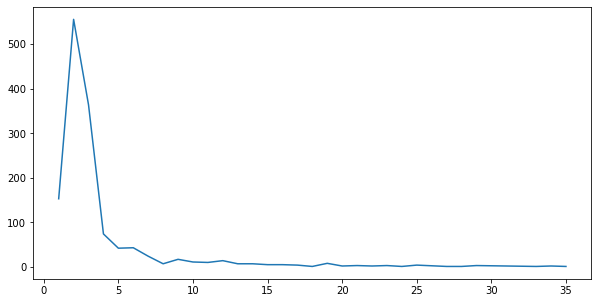

In [235]:
plt.figure(figsize=(10,5))
from collections import Counter
Counter(length_total)
sorted_counter = dict(sorted(Counter(length_total).items()))

plt.plot(list(sorted_counter.keys()), list(sorted_counter.values()))
plt.show()

In [236]:
remained_index = []
for index, value in enumerate(length_total):
    if value<=35: #每个用电器状态运行长度！！！
        remained_index.append(index)
continuous_data_total = [v for i, v in enumerate(continuous_data_total) if i in remained_index]
length_total = [v for i, v in enumerate(length_total) if i in remained_index]

In [237]:
target_length = 35
equal_length = []
for df in continuous_data_total:
    if len(df) <target_length:
        df = pd.concat([df, pd.DataFrame([0]*(target_length-len(df)),columns=["active"])])
        equal_length.append(df.values)

In [238]:
print(len(equal_length))

1375


In [242]:
for i in range(10,51,10):
    np.save(r"C:\Users\ASUS\Desktop\Few-shot NILM (2)\gan_training\rtsgan\training_data\cooking\{}\{}_{}".format(appliance,appliance, i),equal_length[:i])

# construct_df

In [245]:
sample_num = 10

def load_appliance_traces(appliance_lst, sample_num):
    data = {}
    for appliance in appliance_lst:
        np_array = np.load(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\gan_training\rtsgan\training_data\cooking\{}\{}_{}.npy'.format(appliance,appliance,sample_num))
        data[appliance] = np_array
    return data

In [251]:
appliance_data = load_appliance_traces(appliance_lst, sample_num)

In [263]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\cooking\100days_appliance.pkl',
          'rb') as f:
    appliance_time_dic = pickle.load(f)
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\cooking\100days_labels.pkl',
          'rb') as f:
    activity_labels = pickle.load(f)

In [262]:
appliance_data["kettle"]

array([[[1612.5       ],
        [1599.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ]],

       [[1285.40002441],
        [ 978.        ],
        [ 401.25      ],
        [ 952.20001221],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ],
        [   0.        ]

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 创建时间序列
start_date = '2024-09-04'
end_date = '2024-12-12 17:15:00'
date_range = pd.date_range(start=start_date, end=end_date, freq='30S')
df = pd.DataFrame(index=date_range, data=0)


# 遍历用电器，插入数据
for appliance, times in appliance_time_dic.items():
    for start_time in times:
        # 获取对应的时间序列
        time_series = appliance_data.get(appliance, np.zeros(100))
        # 计算结束时间
        end_time = start_time + timedelta(seconds=len(time_series) * 30)
        # 在DataFrame中插入数据
        df.loc[start_time:end_time, appliance] = time_series[:len(df.loc[start_time:end_time])]

df.head()  # 显示DataFrame的前几行以检查结果
